#### PyAnsys调用Ansys求解

正在划分网格……
正在求解……
求解完成


C:\Python\Python39\lib\site-packages\pyvista\core\dataset.py:1192: PyvistaDeprecationWarning: Use of `point_arrays` is deprecated. Use `point_data` instead.
  warnings.warn(
C:\Python\Python39\lib\site-packages\pyvista\core\dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


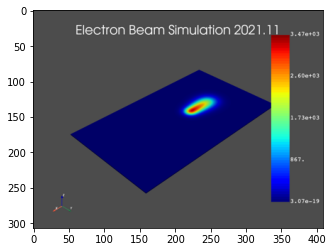

In [7]:
from ansys.mapdl.core import launch_mapdl
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

os.system('TASKKILL /F /IM ANSYS.exe')

mapdl = launch_mapdl(run_location=r'C:\dev_spa\dbeam\pyansys\202111', override=True, log_apdl=r'C:\dev_spa\dbeam\pyansys\202111\apdl.log')

elem_size = 0.001, 0.0005
duration = 1.0
n_substeps = 5
powder_thickness = 0.002

mapdl.prep7()
mapdl.block(0, 0.1, 0, 0.06, -0.008 - powder_thickness, - powder_thickness)
mapdl.block(0, 0.1, 0, 0.06, -powder_thickness, 0)

mapdl.mptemp(1, 300)
mapdl.mpdata('ex', 1, 1, 2.0e11)
mapdl.mp('dens', 1, 7850)
mapdl.mp('alpx', 1, 1.23e-5)
mapdl.mp('nuxy', 1, 0.3)
mapdl.mp('kxx', 1, 33)
mapdl.mp('c', 1, 561)
mapdl.mp('murx', 1, 1)
mapdl.mp('reft', 1, 300)

mapdl.et(1, 'solid70')
mapdl.et(2, 'solid70')

print('正在划分网格……')
mapdl.esize(elem_size[0])
# mapdl.mshkey('1')
# mapdl.mshape('0', '3d')
mapdl.vmesh(1)
mapdl.esize(elem_size[1])
mapdl.vmesh(2)
mapdl.esel('s', 'cent', 'z', -elem_size[1], 0)

mapdl.lsclear('all')

mapdl.esel('s', 'cent', 'z', -elem_size[1], 0)

# mapdl.eplot()
# exit(0)

mapdl.finish()

heat_source_def = """
*DEL,_FNCNAME
*DEL,_FNCMTID
*DEL,_FNCCSYS
*SET,_FNCNAME,'HFLUX'
*SET,_FNCCSYS,0

! Heat source function definition table generated by Function Editor in the GUI
*DIM,%_FNCNAME%,TABLE,6,26,1,,,,%_FNCCSYS%
!
! Begin of equation: 4e7*exp(-3*(({Y}-0.03)^2+({X}-0.02-0.02*
! {TIME})^2)/0.005^2)
*SET,%_FNCNAME%(0,0,1), 0.0, -999
*SET,%_FNCNAME%(2,0,1), 0.0
*SET,%_FNCNAME%(3,0,1), 0.0
*SET,%_FNCNAME%(4,0,1), 0.0
*SET,%_FNCNAME%(5,0,1), 0.0
*SET,%_FNCNAME%(6,0,1), 0.0
*SET,%_FNCNAME%(0,1,1), 1.0, -1, 0, 0, 0, 0, 0
*SET,%_FNCNAME%(0,2,1), 0.0, -2, 0, 1, 0, 0, -1
*SET,%_FNCNAME%(0,3,1),   0, -3, 0, 1, -1, 2, -2
*SET,%_FNCNAME%(0,4,1), 0.0, -1, 0, 3, 0, 0, -3
*SET,%_FNCNAME%(0,5,1), 0.0, -2, 0, 1, -3, 3, -1
*SET,%_FNCNAME%(0,6,1), 0.0, -1, 0, 0.03, 0, 0, 3
*SET,%_FNCNAME%(0,7,1), 0.0, -3, 0, 1, 3, 2, -1
*SET,%_FNCNAME%(0,8,1), 0.0, -1, 0, 2, 0, 0, -3
*SET,%_FNCNAME%(0,9,1), 0.0, -4, 0, 1, -3, 17, -1
*SET,%_FNCNAME%(0,10,1), 0.0, -1, 0, 0.02, 0, 0, 2
*SET,%_FNCNAME%(0,11,1), 0.0, -3, 0, 1, 2, 2, -1
*SET,%_FNCNAME%(0,12,1), 0.0, -1, 0, 0.02, 0, 0, 1
*SET,%_FNCNAME%(0,13,1), 0.0, -5, 0, 1, -1, 3, 1
*SET,%_FNCNAME%(0,14,1), 0.0, -1, 0, 1, -3, 2, -5
*SET,%_FNCNAME%(0,15,1), 0.0, -3, 0, 2, 0, 0, -1
*SET,%_FNCNAME%(0,16,1), 0.0, -5, 0, 1, -1, 17, -3
*SET,%_FNCNAME%(0,17,1), 0.0, -1, 0, 1, -4, 1, -5
*SET,%_FNCNAME%(0,18,1), 0.0, -3, 0, 1, -2, 3, -1
*SET,%_FNCNAME%(0,19,1), 0.0, -1, 0, 0.005, 0, 0, 0
*SET,%_FNCNAME%(0,20,1), 0.0, -2, 0, 2, 0, 0, -1
*SET,%_FNCNAME%(0,21,1), 0.0, -4, 0, 1, -1, 17, -2
*SET,%_FNCNAME%(0,22,1), 0.0, -1, 0, 1, -3, 4, -4
*SET,%_FNCNAME%(0,23,1), 0.0, -1, 7, 1, -1, 0, 0
*SET,%_FNCNAME%(0,24,1), 0.0, -2, 0, 4e7, 0, 0, -1
*SET,%_FNCNAME%(0,25,1), 0.0, -3, 0, 1, -2, 3, -1
*SET,%_FNCNAME%(0,26,1), 0.0, 99, 0, 1, -3, 0, 0
! End of equation: 4e7*exp(-3*(({Y}-0.03)^2+({X}-0.02-0.02*{TIME})^2)/0.005^2)

/solu
sfe, all, , hflux, , %HFLUX%
"""
mapdl.run_multiline(heat_source_def)

mapdl.slashsolu()
mapdl.antype('4')
mapdl.outres('all', 'all')
mapdl.kbc(1)
mapdl.timint('on')
mapdl.tintp(0.005, 0, 0, 1, 0.5, 0.2)
mapdl.autots('off')

mapdl.time(duration)
mapdl.nsubst(n_substeps, n_substeps, n_substeps)
print('正在求解……')
mapdl.solve()
print('求解完成')

mapdl.finish()
mapdl.post1()

imgs = []
ratio = 0.4

for step in range(n_substeps):
    mapdl.set(1, step + 1)
    plotter = mapdl.post_processing.plot_nodal_temperature(return_plotter=True)
    plotter.add_title('Electron Beam Simulation 2021.11', font='arial')
    img = plotter.show(jupyter_backend='matplotlib', return_viewer=True)
    arr = np.array(img)
    width, height = int(arr.shape[1] * ratio), int(arr.shape[0] * ratio)
    imgs.append(np.array(img.resize((width, height))))
    # plt.imshow(img)
    # plt.show()

plt.imshow(imgs[-1])
plt.show()


#### 动画显示（请先运行上面的代码块）

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML

def plot_sequence_images(image_array):
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[:2]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=duration / n_substeps * 1000, repeat_delay=0.5, repeat=True)
    html = anim.to_jshtml(fps=n_substeps / duration, default_mode='loop')
    vid = 'C:/dev_spa/dbeam/pyansys/202111/temp.mp4'
    anim.save(vid, codec='mpeg4')
    html_template = f'''<div width="320" height="240">{html}</div>'''
    display(HTML(html_template))


plot_sequence_images(imgs)

<Figure size 408x306 with 0 Axes>

In [6]:
import ansys.mapdl.core as pymapdl
inputfile = 'ansys_inputfile.inp'
pyscript = 'Ansys/dpyansys.py'
pymapdl.convert_script(inputfile, pyscript)

FileNotFoundError: [Errno 2] No such file or directory: 'ansys_inputfile.inp'